<a href="https://colab.research.google.com/github/matteobpunto/MAP_marketing_ads_predictor/blob/main/marketing_ads_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

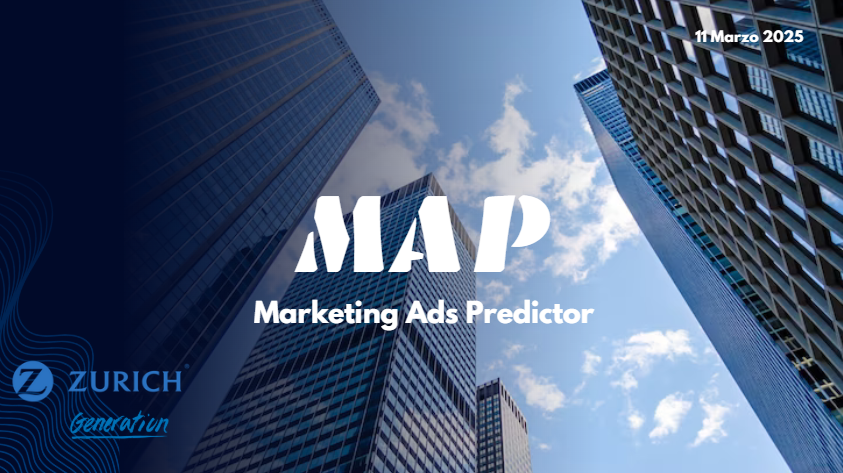

# 📊 MAP - Marketing ADS Predictor



MAP is an educational project made for Zurich x Generation that analyzes and predict campaign sales using different types of media.
This tool is designed to help businesses optimize their advertising investments by leveraging machine learning techniques.


# Project request


*> The project requires the analysis of a dataset (Advertising_modified.csv) containing information on investments in advertising campaigns, categorized into TV, Radio, and Newspaper campaigns. The goal of the project is to identify potential correlations between the different campaigns, determine which marketing strategies (TV, Radio, and/or Newspaper) lead to the highest sales increase, and develop a machine learning algorithm based on regression to predict sales projections based on a given investment in one or more of these strategies. Finally, the project should bedocumented by creating a report using a Python notebook (.ipynb).*

📂 You can read and check the .csv file [at this link](https://drive.google.com/file/d/1Wc-Sd3K2FjpfbUFHPabOoDTl2PM1fEco/view)

# **Installation**

To install MAP and run the program, you can use your bash console:


```
# git clone https://github.com/matteobpunto/MAP_marketing_ads_predictor.git  
cd MAP_marketing_ads_predictor  
pip install -r requirements.txt  
python main.py

```



# **Program languages and utility tools**

🐍 Python as main program language (to extend, we used powerful libraries such as [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for data visualization) for various queries;

🐒 MongoDB as non-relational database platform (this was used only for an educational purpose);

🐳 MySQL (in particular, MariaDB) as relational database platform to manage different datasets.

# **How it works**

🖥️ MAP is a standalone application built using Python as program language, one of the best tool for its flexibility, spreadability and simplicity as well.
Using MAP you will be able to show how your investments in advertising will be perceived by your audience according to previous results.

# Data Cleaning 🧹

A Python script for data cleaning is available in the 'data_cleaning' directory. This script removes null values from the dataset, ensuring data consistency before analysis and model training

# Machine Learning 🤖

We implemented a regression-based Machine Learning model to predict sales outcomes based on advertising investments. The model was trained using [scikit-learn](https://scikit-learn.org/stable/)

# Power BI 📊

We developed a Power BI dashboard to provide interactive data visualization and insights. The dashboard includes:


*   Sales trend analysis 📈
*   Correlation between investments and revenue 🔄
*   Predictive analysis based on the trained Machine Learning model🔮

# Website development 🌐

A web-based interface was created to make MAP more accessible and user-friendly. The website was built using Flask (backend) and HTML/CSS (frontend), allowing users to:



*   Upload their own advertising investment data 📤
*   View dynamic visualizations 🎨
*   Access Machine Learning predictions in real-time ⏳




# **Notebook Navigation**

*   [Create a MySQL database to store advertising campaign data](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=bhOA0njMuDYZ)
*   Insert and manage datasets efficiently ([Company Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=Dwe2QIcit7xy), [Marketing Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=3pqcFW0FvUPA), [Slot Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=BkJDax2yvjLf), [Target Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=gxLTaNkzwNHW), [Broadcoaster Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=IbGMHUz1wp0n), [Type Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=OlNIGLtHxC_N), [TV Marketing Insertion](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=Z3_2qSTdxlwV))
*   Applied a regression model using [Machine Learning](https://colab.research.google.com/drive/1Co8Yg6qGG9unoN3Bj0cmwLZO3bNJnmT0#scrollTo=3LUWlFyOX4j9) to predict sales based on advertising investments, trained with scikit-learn.





# **DATABASE CREATION**

In [ ]:
import mysql.connector
import csv

# Connect to the MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

cursor = conn.cursor()

# Create SQL database
cursor.execute("CREATE DATABASE IF NOT EXISTS marketing_adv")

cursor.execute("USE marketing_adv")

cursor.execute("""
CREATE TABLE IF NOT EXISTS company (
    company_id INT PRIMARY KEY AUTO_INCREMENT,
    name VARCHAR(50),
    office VARCHAR(50),
    n_employees INT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS marketing (
    marketing_id INT PRIMARY KEY AUTO_INCREMENT,
    tv FLOAT,
    radio FLOAT,
    newspaper FLOAT,
    sales FLOAT,
    company_id INT,
    FOREIGN KEY (company_id) REFERENCES company(company_id)
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS type (
    type_id INT PRIMARY KEY AUTO_INCREMENT,
    spot BOOL,
    inspot BOOL,
    teleshopping BOOL,
    videoclip BOOL,
    trailer BOOL
    );
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS slot (
    slot_id INT PRIMARY KEY AUTO_INCREMENT,
    time_slot VARCHAR(20)
    );
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS broadcaster (
    broadcaster_id INT PRIMARY KEY AUTO_INCREMENT,
    name VARCHAR(50),
    network VARCHAR(50)
    );
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS target (
    target_id INT PRIMARY KEY AUTO_INCREMENT,
    age_range VARCHAR(20) NOT NULL
    );
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS marketing_tv (
    tv_id INT PRIMARY KEY,
    marketing_id INT,
    type_id INT,
    slot_id INT,
    broadcaster_id INT,
    target_id INT,
    FOREIGN KEY (type_id) REFERENCES type(type_id),
    FOREIGN KEY (slot_id) REFERENCES slot(slot_id),
    FOREIGN KEY (broadcaster_id) REFERENCES broadcaster(broadcaster_id),
    FOREIGN KEY (target_id) REFERENCES target(target_id),
    FOREIGN KEY (marketing_id) REFERENCES marketing(marketing_id)
);
""")

# **COMPANY INSERTION**

In [ ]:
import csv
import mysql.connector

# Connect to the MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

cursor = conn.cursor()

cursor.execute("USE marketing_adv")


with open('Aziende_Italiane.csv', encoding='utf-8') as f:
    lettore = csv.reader(f, delimiter=',')
    f.readline()

    lista_prova = []
    for riga in lettore:

        query = f"INSERT INTO company (name, office, n_employees) VALUES ('{riga[0]}','{riga[1]}', {riga[2]})"
        print(query)

        cursor.execute(query)

        lista_prova.append(query)


conn.commit()

print("The company data has been succesfully inserted!")
print(lista_prova)

cursor.close()
conn.close()

# **MARKETING INSERTION**

In [ ]:
import csv
import mysql.connector
import random

# Connect to the MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="marketing_adv"  # Set the database directly in the connection
)

cursor = conn.cursor()

# Get all available company_id values from the company table
cursor.execute("SELECT company_id FROM company")
company_ids = cursor.fetchall()
for row in company_ids:
    company_id = row[0]


# Open the CSV file
with open('Advertising_clear.csv', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    f.readline()

    query = """
    INSERT INTO marketing (tv, radio, newspaper, sales, company_id)
    VALUES (%s, %s, %s, %s, %s)
    """

    data_to_insert = []
    for row in reader:
        tv = float(row[0])
        radio = float(row[1])
        newspaper = float(row[2])
        sales = float(row[3])
        company_id = random.choice(company_ids)[0]

        data_to_insert.append((tv, radio, newspaper, sales, company_id))

    cursor.executemany(query, data_to_insert)
    conn.commit()
print("Marketing data has been successfully inserted!")

# Close the cursor and connection
cursor.close()
conn.close()

# **SLOT INSERTION**

In [ ]:
import mysql.connector

# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="marketing_adv"
)

cursor = conn.cursor()

# Define time slots
time_slots = [
    ('00:00', '04:00', '04:00', '08:00', '08:00', '12:00', '12:00', '16:00', '16:00', '20:00', '20:00', '00:00')
]

# SQL query to insert data
query = """
INSERT INTO slot (slot1_start, slot1_end, slot2_start, slot2_end,
                  slot3_start, slot3_end, slot4_start, slot4_end,
                  slot5_start, slot5_end, slot6_start, slot6_end)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Execute the query
cursor.executemany(query, time_slots)

# Commit the transaction
conn.commit()

print("Time slot data has been successfully inserted!")

# Close the cursor and connection
cursor.close()
conn.close()

# **TARGET INSERTION**

In [ ]:
import mysql.connector

# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="marketing_adv"
)

cursor = conn.cursor()

# SQL query to insert data into the 'target' table
query = "INSERT INTO target (age_range) VALUES (%s)"
values = [
    ('under 18',),
    ('18 - 25',),
    ('25 - 40',),
    ('40 - 60',),
    ('over 60',)
]


cursor.executemany(query, values)

# Commit the changes to the database
conn.commit()

print("Target data has been succesfully inserted!")

# Close the cursor and connection
cursor.close()
conn.close()

# **BROADCOASTER INSERTION**

In [ ]:
import csv
import mysql.connector

# Connect to the MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

cursor = conn.cursor()

cursor.execute("USE marketing_adv")


with open('../../../Downloads/Reti_Televisive_Italiane_Uniche.csv', encoding='utf-8') as f:
    lettore = csv.reader(f, delimiter=',')
    f.readline()

    lista_prova = []
    for riga in lettore:

        query = f"INSERT INTO broadcaster (name, network) VALUES ('{riga[0]}','{riga[1]}')"
        print(query)

        cursor.execute(query)

        lista_prova.append(query)


conn.commit()

print("Broadcoaster`s data has been successfully inserted!")
print(lista_prova)

cursor.close()
conn.close()

# **TYPE INSERTION**

In [ ]:
import csv
import mysql.connector
import random
from mysql.connector import Error

def recupera_dati_lista_int(query):
    try:
        # Conection to the database
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="",
            database="marketing_adv"
        )
        if connection.is_connected():
            cursor = connection.cursor()  # Returns results as dictionaries

            # Execution of the query
            cursor.execute(query)

            # Dataa retrival
            result = [elem[0] for elem in cursor.fetchall()]

            cursor.close()
            return result
    except Error as e:
        print(f"Error while executing the query: {e}")
        return None
    finally:
        if connection.is_connected():
            connection.close()

# Connection to the MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

cursor = conn.cursor()

cursor.execute("USE marketing_adv")

lista_bool = [True, False]
lista_tipi = ["spot", "inspot", "teleshopping", "videoclip", "trailer"]

tipo_scelto = random.choice(lista_tipi)
indice = lista_tipi.index(tipo_scelto)

colonne = recupera_dati_lista_int("SELECT COUNT(*) FROM marketing")

for _ in range(189):
    stringa = ''

    for x in range(len(lista_tipi)):
        if x == indice:
            stringa += 'TRUE'
        else:
            stringa += 'FALSE'

        if x != len(lista_tipi) - 1:
            stringa += ', '

    query = (f"INSERT INTO type(`spot`, `inspot`, `teleshopping`, `videoclip`, `trailer`)"
             f" VALUES ({stringa})")

    cursor.execute(query)
    conn.commit()

    print("Type data has been succesfully inserted!")


    cursor.close()
    conn.close()

# **TV MARKETING INSERTION**

In [ ]:
# Importing the libraries we'll use

import mysql.connector
import random
from marketing_ads_predictor.database2.insert_type import recupera_dati_lista_int

# Connection to the mySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

# Creation of a cursor to navigate our database
cursor = conn.cursor()

# Selecting the right database
cursor.execute("USE marketing_adv")

# Using the mySQL language for the insert of marketing values

insertInto = ("INSERT INTO `marketing_tv`(`marketing_id`, `type_id`, `slot_id`, `broadcaster_id`, `target_id`)"
              " VALUES ('[value-2]','[value-3]','[value-4]','[value-5]','[value-6]')")

# Taking all the marketing id`s from marketing and order them by their id
cursor.execute("SELECT marketing_id FROM marketing ORDER BY `marketing`.`marketing_id` ASC")
Marketing_list_id = cursor.fetchall()
print(type(Marketing_list_id))
print(Marketing_list_id)

# Creating dictionaries for age groups and percentages of their weight
age_groups = {
    1: "under 18",
    2: "18 - 25",
    3: "25 - 40",
    4: "40 - 60",
    5: "over 60"
}

percentages = {
    1: 30,  # 10% under 18
    2: 5,  # 20% 18-25
    3: 15,  # 25% 25-40
    4: 20,  # 15% 40-60
    5: 30  # 30% over 60
}

# Counting all data from marketing and converting them into percentages
num_samples = 189
weights = [percentages[key] / 100 for key in age_groups]

# Creating a random list using random function to determine the percentages
random_list = random.choices(list(age_groups.keys()), weights=weights, k=num_samples)

print(random_list)
print(len(random_list))

# Creating dictionaries for time slot and a dictionary
time_slots = {
    "18 - 25": ["00:00 - 04:00"],
    "25 - 40": ["04:00 - 08:00"],
    "over 60": ["08:00 - 12:00"],
    "under 18": ["12:00 - 16:00", "16:00 - 20:00"],
    "40 - 60": ["20:00 - 00:00"]
}

Slot_dictionary = {
    "00:00 - 04:00": 1,
    "04:00 - 08:00": 2,
    "08:00 - 12:00": 3,
    "12:00 - 16:00": 4,
    "16:00 - 20:00": 5,
    "20:00 - 00:00": 6
}

valuesInsertInto = ""
row_count = 0
for i, num in enumerate(random_list):
    # id taken from marketing table
    marketingID = i + 1
    # id taken from type table
    typeID = i + 1

    # id target table taken from list made with the weighted percentages
    targetID = num
    print(marketingID)
    print(num)
    targetinstringa = age_groups.get(targetID)
    slot = time_slots.get(targetinstringa)
    slotgiusto = random.choice(slot)
    slotID = Slot_dictionary.get(slotgiusto)
    broadcasterID = random.randint(1, 10)

    valuesInsertInto = f"{marketingID}, {typeID}, {slotID}, {broadcasterID}, {targetID}"

    query = f"""INSERT INTO `marketing_tv`(`marketing_id`, `type_id`, `slot_id`, `broadcaster_id`, `target_id`)
               VALUES ({valuesInsertInto})"""

    cursor.execute(query)
    row_count += 1

# Commit of the modifications
conn.commit()

print(f"{row_count} rows have been succesfully inserted!")

# Connection closed
cursor.close()
conn.close()

# **MACHINE LEARNING**

In [ ]:
# --- IMPORT SECTION --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics  import mean_absolute_error
import math
import pickle
from joblib import dump, load
# --- END OF IMPORT SECTION --

# Load the CSV file
file_path = "../Advertising_clear.csv"
df = pd.read_csv(file_path)

# Sales Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["sales"], bins=15, kde=True, color="blue")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Creating a pair plot to visualize relationships between variables
sns.pairplot(data=df)
plt.show()

# Separate independent and dependent variables
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

# Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_lin_pred = lin_model.predict(X_test_scaled)

# Print coefficients
print("Model coefficients:",lin_model.coef_ ) #Feature 1: tv, feature 2: radio, feature 3: newspaper

# Evaluate Linear Regression
rmse_lin = math.sqrt(mean_squared_error(y_test, y_lin_pred))
print(f"Linear Regression RMSE: {rmse_lin:.2f}")
mae_lin = mean_absolute_error(y_test, y_lin_pred)
print(f"Linear Regression MAE: {mae_lin:.2f}")
mse_lin = mean_squared_error(y_test, y_lin_pred)
print(f"Linear Regression MSE: {mse_lin:.2f}")

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
rmse_poly = math.sqrt(mean_squared_error(y_test, y_poly_pred))
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}")
mae_poly = mean_absolute_error(y_test, y_poly_pred)
print(f"Polynomial Regression MAE: {mae_poly:.2f}")
mse_poly = mean_squared_error(y_test, y_poly_pred)
print(f"Polynomial Regression MSE: {mse_poly:.2f}")

# Visualization: Scatter plots of predicted vs actual data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# TV vs Sales (test set only)
axes[0].plot(X_test['TV'], y_test, 'o', label='Actual Sales')
axes[0].plot(X_test['TV'], y_lin_pred, 'o', color='red', label='Predicted Sales (Linear)')
axes[0].plot(X_test['TV'], y_poly_pred, 'o', color='green', label='Predicted Sales (Polynomial)')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")
axes[0].legend()

# Radio vs Sales (test set only)
axes[1].plot(X_test['radio'], y_test, 'o', label='Actual Sales')
axes[1].plot(X_test['radio'], y_lin_pred, 'o', color='red', label='Predicted Sales (Linear)')
axes[1].plot(X_test['radio'], y_poly_pred, 'o', color='green', label='Predicted Sales (Polynomial)')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")
axes[1].legend()

# Newspaper vs Sales (test set only)
axes[2].plot(X_test['newspaper'], y_test, 'o', label='Actual Sales')
axes[2].plot(X_test['newspaper'], y_lin_pred, 'o', color='red', label='Predicted Sales (Linear)')
axes[2].plot(X_test['newspaper'], y_poly_pred, 'o', color='green', label='Predicted Sales (Polynomial)')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
axes[2].legend()

# show the plot
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Load the CSV file
file_path = "../data_cleaning/file_clear.csv"
df = pd.read_csv(file_path)

# Separate independent and dependent variables
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

# Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize lists to store RMSE errors
train_rmse_errors = []
test_rmse_errors = []

degree = 9

poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_converter.fit_transform(X_train_scaled)  # Apply to training data
X_test_poly = poly_converter.transform(X_test_scaled)       # Apply to test data

# Train the model on the polynomial training data
model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly, y_train)  # Fit the model using the training data

# Predict on the training and test data
train_pred = model.predict(X_train_poly)
test_pred = model.predict(X_test_poly)

# Calculate the RMSE errors
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

# Append RMSE errors to the lists
train_rmse_errors.append(train_rmse)
test_rmse_errors.append(test_rmse)

# Stampa dei coefficienti
print("Coefficienti del modello:",model.coef_ ) #Feature 1: tv, feature 2: radio, feature 3: newspaper
                                                #Feature 1^2: tv^2, feature 2^2: radio^2, feature 3^2: newspaper^2
                                                #Feature 1 x feature 2: tv x radio, feature 1 x feature 3: tv x newspaper,
                                                #feature 2 x feature 3: radio x newspaper

# Loop through degrees 1 to 5 for polynomial regression
for d in range(1, degree):  # Loop from degree 1 to 5
    # Create polynomial features for degree 'd'
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_converter.fit_transform(X_train_scaled)  # Apply to training data
    X_test_poly = poly_converter.transform(X_test_scaled)       # Apply to test data

    # Train the model on the polynomial training data
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_poly, y_train)  # Fit the model using the training data

    # Predict on the training and test data
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    # Calculate the RMSE errors
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    # Append RMSE errors to the lists
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

# Plotting RMSE for different polynomial degrees
plt.figure(figsize=(8, 6))
plt.plot(range(1, degree + 1), train_rmse_errors, label='TRAIN', marker='o')
plt.plot(range(1, degree + 1), test_rmse_errors, label='TEST', marker='o')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Complexity")
plt.legend()
plt.grid(True)
plt.show()
